## This is our workspace for statistical analysis!

Add cells, do exploratory analysis, go ham.

In [23]:
# feel free to add more

import sqlite3
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
# Create connection to database
conn = sqlite3.connect('../data/db/avocado_project.db')
c = conn.cursor()

In [25]:
# Print out tables in database
list_tables_cmd = "SELECT name FROM sqlite_master WHERE type='table';"
c.execute(list_tables_cmd)
conn.commit()

for row in c:
  print(row)

('demographic',)
('hab2016',)
('hab2017',)
('hab2018',)
('joined_data',)


In [26]:
# Load all tables into dataframe
query1 = "SELECT * FROM demographic"
demo_df = pd.read_sql(query1, conn)

query2 = "SELECT * FROM hab2016"
hab2016_df = pd.read_sql(query2, conn)
hab2016_df.rename(columns={'units_current_year': '2016_units_current_year',
                          'dollars_current_year': '2016_dollars_current_year',
                          'asp_current_year': '2016_asp_current_year'}, inplace=True)

query3 = "SELECT * FROM hab2017"
hab2017_df = pd.read_sql(query3, conn)
hab2017_df.rename(columns={'units_current_year': '2017_units_current_year',
                          'dollars_current_year': '2017_dollars_current_year',
                          'asp_current_year': '2017_asp_current_year'}, inplace=True)

query4 = "SELECT * FROM hab2018"
hab2018_df = pd.read_sql(query4, conn)
hab2018_df.rename(columns={'units_current_year': '2018_units_current_year',
                          'dollars_current_year': '2018_dollars_current_year',
                          'asp_current_year': '2018_asp_current_year'}, inplace=True)

In [27]:
mean_pop = []
median_pop = []
stddev_pop = []

for index, row in demo_df.iterrows():
    pop_list = [row['pop2016'], row['pop2017'], row['pop2018']]
    means = np.mean(pop_list)
    median = np.median(pop_list)
    std_dev = np.std(pop_list)
    mean_pop.append(means)
    median_pop.append(median)
    stddev_pop.append(std_dev)
    
demo_df["Mean Population"] = mean_pop
demo_df["Median Population"] = median_pop
demo_df["Standard Deviation Population"] = stddev_pop
demo_df

#we might want to remove the rows with age 999 as its just an aggregation of all the previous rows of that region


,region,age,sex,pop2016,pop2017,pop2018,Mean Population,Median Population,Standard Deviation Population
0,California,0,F,239546,235400,233156,2.360340e+05,235400.0,2646.946921
1,California,0,M,251535,246740,244164,2.474797e+05,246740.0,3054.312834
2,California,1,F,243956,239361,234983,2.394333e+05,239361.0,3663.568964
3,California,1,M,256635,250616,245824,2.510250e+05,250616.0,4423.037493
4,California,2,F,243382,243308,238803,2.418310e+05,243308.0,2141.332451
...,...,...,...,...,...,...,...,...,...
1387,West,84,M,43082,44018,44212,4.377067e+04,44018.0,493.359459
1388,West,85,F,379224,384587,389779,3.845300e+05,384587.0,4309.249200
1389,West,85,M,230056,236742,243372,2.367233e+05,236742.0,5436.250260
1390,West,999,F,17599328,17856296,18114533,1.785672e+07,17856296.0,210331.773163


In [32]:
# Load all tables into dataframe
# query1 = "SELECT * FROM demographic"
# demo_df = pd.read_sql(query1, conn)

query2 = "SELECT * FROM hab2016"
hab2016_raw_df = pd.read_sql(query2, conn)
hab2016_raw_df['Year'] = 2016

query3 = "SELECT * FROM hab2017"
hab2017_raw_df = pd.read_sql(query3, conn)
hab2017_raw_df['Year'] = 2017

query4 = "SELECT * FROM hab2018"
hab2018_raw_df = pd.read_sql(query4, conn)
hab2018_raw_df['Year'] = 2018

In [33]:
# join all three avocado data frames
hab_df = pd.concat([hab2016_raw_df, hab2017_raw_df, hab2018_raw_df], axis=1)
hab_df

,region,units_prior_year,units_current_year,dollars_prior_year,dollars_current_year,asp_prior_year,asp_current_year,Year,region,units_prior_year,...,asp_current_year,Year,region,units_prior_year,units_current_year,dollars_prior_year,dollars_current_year,asp_prior_year,asp_current_year,Year
0,California,2.815620e+08,2.742912e+08,2.938569e+08,3.161020e+08,12.553616,14.193095,2016,California,3.163792e+08,...,18.487848,2017,California,2.892980e+08,3.449431e+08,3.806062e+08,3.965100e+08,17.467113,15.074676,2018
1,Great Lakes,1.565253e+08,1.585368e+08,1.746281e+08,1.920213e+08,13.370501,14.862985,2016,Great Lakes,1.828621e+08,...,19.554727,2017,Great Lakes,1.767339e+08,2.205796e+08,2.455320e+08,2.528185e+08,18.420128,14.962134,2018
2,Midsouth,1.353713e+08,1.470024e+08,1.532692e+08,1.749785e+08,13.567583,14.537764,2016,Midsouth,1.666395e+08,...,18.956182,2017,Midsouth,1.626263e+08,2.020955e+08,2.206566e+08,2.370726e+08,17.740391,15.288319,2018
3,Northeast,1.911689e+08,2.077816e+08,2.342339e+08,2.654976e+08,14.719099,15.702439,2016,Northeast,2.367107e+08,...,20.727892,2017,Northeast,2.240129e+08,2.939438e+08,3.334003e+08,3.715844e+08,19.418093,16.582135,2018
4,Plains,8.319278e+07,8.805425e+07,9.108528e+07,9.987437e+07,13.170314,13.988476,2016,Plains,1.011263e+08,...,18.529716,2017,Plains,9.559421e+07,1.170123e+08,1.266354e+08,1.283651e+08,17.497439,14.276865,2018
5,South Central,2.755884e+08,2.798747e+08,2.304405e+08,2.495642e+08,10.050216,10.873204,2016,South Central,3.231953e+08,...,13.872400,2017,South Central,3.090627e+08,3.846433e+08,3.079581e+08,3.216136e+08,13.120511,10.926425,2018
6,Southeast,1.498071e+08,1.755572e+08,1.646243e+08,1.968386e+08,13.199943,13.874733,2016,Southeast,2.003659e+08,...,19.002511,2017,Southeast,1.895716e+08,2.603579e+08,2.566267e+08,2.893458e+08,17.859741,14.499490,2018
7,West,2.782710e+08,2.821855e+08,2.785080e+08,2.989914e+08,12.025842,13.064521,2016,West,3.260830e+08,...,16.698210,2017,West,3.081864e+08,3.753159e+08,3.665522e+08,4.001218e+08,15.696705,13.986238,2018


In [34]:
region = []
current_units_mean = []
current_units_median = []
current_units_stddev = []

current_dollars_mean = []
current_dollars_median = []
current_dollars_stddev = []

current_asp_mean = []
current_asp_median = []
current_asp_stddev = []

for index, row in hab2016_df.iterrows(): 
    region.append(row['region'])
    for index1, row1 in hab2017_df.iterrows():
        for index2, row2 in hab2018_df.iterrows():
            current_units_list = [row['2016_units_current_year'], row1['2017_units_current_year'], row2['2018_units_current_year']]
            current_dollars_list = [row['2016_dollars_current_year'], row1['2017_dollars_current_year'], row2['2018_dollars_current_year']]
            current_asp_list = [row['2016_asp_current_year'], row1['2017_asp_current_year'], row2['2018_asp_current_year']]
            
    units_mean = np.mean(current_units_list)
    units_median = np.median(current_units_list)
    units_std_dev = np.std(current_units_list)
    current_units_mean.append(units_mean)
    current_units_median.append(units_median)
    current_units_stddev.append(units_std_dev)
            
    dollars_mean = np.mean(current_dollars_list)
    dollars_median = np.median(current_dollars_list)
    dollars_std_dev = np.std(current_dollars_list)
    current_dollars_mean.append(dollars_mean)
    current_dollars_median.append(dollars_median)
    current_dollars_stddev.append(dollars_std_dev)
            
    asp_mean = np.mean(current_asp_list)  
    asp_median = np.median(current_asp_list)
    asp_std_dev = np.std(current_asp_list)  
    current_asp_mean.append(asp_mean)
    current_asp_median.append(asp_median)
    current_asp_stddev.append(asp_std_dev)
            
combined_avo_data = {'region' : region,
                     'units_current_year_mean' : current_units_mean, 
                     'units_current_year_median' : current_units_median,
                    'units_current_year_std_dev' : current_units_stddev,
                    'dollars_current_year_mean' : current_dollars_mean, 
                     'dollars_current_year_median' : current_dollars_median,
                    'dollars_current_year_std_dev' : current_dollars_stddev,
                    'asp_current_year_mean' : current_asp_mean, 
                     'asp_current_year_median' : current_asp_median,
                    'asp_current_year_std_dev' : current_asp_stddev}

combined_avo_df = pd.DataFrame(combined_avo_data)

In [35]:
# summarize dataframe
demo_df.describe()

,age,pop2016,pop2017,pop2018,Mean Population,Median Population,Standard Deviation Population
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,27.500000,273738.703125,274983.199219,276028.218750,274916.707031,274952.558594,3796.086868
std,4.618802,64981.381363,65022.503640,65120.031945,64885.208319,64988.611562,2587.869534
min,20.000000,132729.000000,133290.000000,133884.000000,134225.333333,133585.000000,262.163223
25%,23.750000,249830.500000,251822.250000,253082.000000,252347.500000,252361.250000,1907.393350
50%,27.500000,277373.000000,279592.500000,280493.000000,280072.333333,279762.000000,3236.344285
75%,31.250000,301072.250000,303494.750000,305040.000000,301842.583333,302387.000000,4935.842549
max,35.000000,412189.000000,415091.000000,416227.000000,409211.333333,410401.000000,12347.750411


In [36]:
# parse out rows that correspon to millenials
demo_df = demo_df.loc[(demo_df['age'] <= 35) & (demo_df['age'] >= 20)]
demo_df

# todo sum F and M together to get total population

,region,age,sex,pop2016,pop2017,pop2018,Mean Population,Median Population,Standard Deviation Population
40,California,20,F,252888,249663,246589,249713.333333,249663.0,2571.802265
41,California,20,M,261741,256487,253086,257104.666667,256487.0,3560.279983
42,California,21,F,259769,254458,251061,255096.000000,254458.0,3583.536335
43,California,21,M,268650,262335,258126,263037.000000,262335.0,4324.985318
44,California,22,F,268170,264370,258629,263723.000000,264370.0,3921.872597
...,...,...,...,...,...,...,...,...,...
1285,West,33,M,250759,250579,261392,254243.333333,250759.0,5055.404787
1286,West,34,F,244416,245871,244685,244990.666667,244685.0,632.102488
1287,West,34,M,249901,253888,253695,252494.666667,253695.0,1835.691029
1288,West,35,F,241252,247299,248696,245749.000000,247299.0,3230.599428


In [37]:
query = "SELECT * FROM joined_data"
df = pd.read_sql(query, conn)
millenialpop = df['millenial_pop']
boomerpop = df['boomer_pop']
totalpop = df['total_pop']
millenialpercent = (millenialpop / totalpop) * 100
boomerpercent = (boomerpop / totalpop) * 100
df['millenial_pop_percent'] = millenialpercent
df['boomer_percent'] = boomerpercent
df

,region,year,millenial_pop,boomer_pop,total_avo_sold,total_pop,per_cap_avo_sold,units_prior_year,units_current_year,dollars_prior_year,dollars_current_year,asp_prior_year,asp_current_year,millenial_pop_percent,boomer_percent
0,California,2016,9181203,59361156,274291200,39051551,7.02,2.815620e+08,2.742912e+08,2.938569e+08,3.161020e+08,12.553616,14.193095,23.510470,152.007166
1,California,2017,9203129,59775868,310276900,39238620,7.91,3.163792e+08,3.102769e+08,3.574163e+08,4.020201e+08,16.156570,18.487848,23.454263,152.339374
2,California,2018,9206218,60149721,344943100,39400984,8.75,2.892980e+08,3.449431e+08,3.806062e+08,3.965100e+08,17.467113,15.074676,23.365452,152.660454
3,Great Lakes,2016,9950923,72346169,158536800,46772128,3.39,1.565253e+08,1.585368e+08,1.746281e+08,1.920213e+08,13.370501,14.862985,21.275327,154.677951
4,Great Lakes,2017,9956720,72529535,189223700,46832264,4.04,1.828621e+08,1.892237e+08,2.183403e+08,2.597029e+08,17.024001,19.554727,21.260386,154.870871
5,Great Lakes,2018,9963194,72704600,220579600,46885784,4.70,1.767339e+08,2.205796e+08,2.455320e+08,2.528185e+08,18.420128,14.962134,21.249925,155.067472
6,Midsouth,2016,8070600,59103583,147002400,38131989,3.86,1.353713e+08,1.470024e+08,1.532692e+08,1.749785e+08,13.567583,14.537764,21.164907,154.997378
7,Midsouth,2017,8119174,59596597,172399500,38407084,4.49,1.666395e+08,1.723995e+08,1.970757e+08,2.325388e+08,16.789138,18.956182,21.139782,155.170846
8,Midsouth,2018,8157019,60075594,202095500,38665871,5.23,1.626263e+08,2.020955e+08,2.206566e+08,2.370726e+08,17.740391,15.288319,21.096173,155.371113
9,Northeast,2016,12311019,88362289,207781600,56680619,3.67,1.911689e+08,2.077816e+08,2.342339e+08,2.654976e+08,14.719099,15.702439,21.719980,155.895067


In [16]:
millenial_percent_2018 = df[df['year']==2018]['millenial_pop_percent']
avo_cap_2018 = df[df['year']==2018]['per_cap_avo_sold']
boomerpop_2018 = df[df['year']==2018]['boomer_pop']
x = np.array(millenial_percent_2018).reshape((-1, 1))
y = np.array(avo_cap_2018)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6448398243992206
intercept: -38.17657350889414
slope: [2.06443939]


In [72]:
x = millenial_percent_2018
y = avo_cap_2018
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 13 Apr 2020   Prob (F-statistic):             0.0164
Time:                        19:17:14   Log-Likelihood:                -13.280
No. Observations:                   8   AIC:                             30.56
Df Residuals:                       6   BIC:                             30.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.1766     13.666     -2.794      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [67]:
def reject_or_not(test_statistic, lower_crit_val, upper_crit_val):
  print(f"test_statistic={test_statistic:.5f}, lower_critical_value={lower_crit_val:.5f}, upper_critical_value={upper_crit_val:.5f}")
  if lower_crit_val <= test_statistic <= upper_crit_val:
    print("We therefore fail to reject the null hypothesis and cannot accept the alternate hypothesis.")
  else:
    print("We therefore reject the null hypothesis and accept the alternate hypothesis.")

In [68]:
def degrees_of_freedom(a, b):
  s_1 = np.var(a)
  s_2 = np.var(b)
  n_1 = np.shape(a)[0]
  n_2 = np.shape(b)[0]

  nr = ((s_1/n_1) + (s_2/n_2))**2
  dr = (((s_1/n_1)**2)/(n_1 - 1)) + (((s_2/n_2)**2)/(n_2 - 1))
  return nr / dr

degrees_of_freedom = degrees_of_freedom(a=millenialpop_2018, b=boomerpop_2018)
print(f"degrees_of_freedom={degrees_of_freedom}")

degrees_of_freedom=7.000000000000043


In [70]:
#𝐻0 : There is no significant difference in the population of the US between millenials and boomers in 2018.

#𝐻𝐴: There is a significant difference in the population of the US between millenials and boomers in 2018.

test_statistic, p_value = stats.ttest_ind(a=millenialpop_2018, b=boomerpop_2018, equal_var=False)
lower_crit_val, upper_crit_val = stats.t.ppf(0.025, degrees_of_freedom), stats.t.ppf(0.975, degrees_of_freedom)
reject_or_not(test_statistic, lower_crit_val, upper_crit_val)

test_statistic=-11.05946, lower_critical_value=-2.36462, upper_critical_value=2.36462
We therefore reject the null hypothesis and accept the alternate hypothesis.


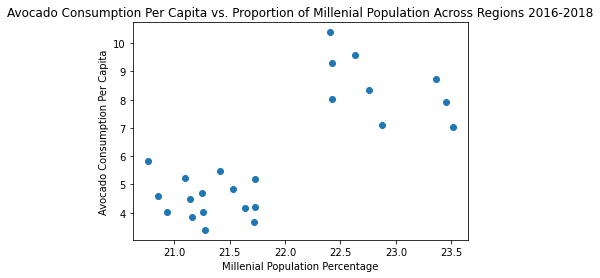

In [20]:
millenial_percent = df['millenial_pop_percent']
avo_cap = df['per_cap_avo_sold']
plt.scatter(millenial_percent, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Proportion of Millenial Population Across Regions 2016-2018")
plt.xlabel("Millenial Population Percentage")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()